In [42]:
import pandas as pd
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.metrics import classification_report
from termcolor import colored
import matplotlib.pyplot as plt

In [2]:
def prediciton_info(x_train_arg, y_train_arg,  x_test_arg, y_test_arg, y_pred_arg, indices_arg, distances_arg):

    k=len(indices_arg[0])
    for i in range(0, len(x_test_arg)):
        print(colored("test_point: ", "blue"),
              colored(x_test_arg.iloc[i], "blue"), sep="\n")

        if (y_test_arg.iloc[i] == y_pred_arg[i]):
            color = "green"
        else:
            color = "red"

        print("actual: ",  colored(y_test_arg.iloc[i], color))
        print("predicted: ", colored(y_pred_arg[i], color))

        print("\n", colored("neighbours: ", "blue"))
        for j in range(0, k):
            print(x_train.iloc[indices_arg[i][j]: (indices_arg[i][j] + 1)])
            print("class:", colored(y_train_arg.iloc[indices_arg[i][j]], "yellow"))
            print("distance: ", distances_arg[i][j], "\n")

        print("\n")

In [3]:
def class_info(clf_arg, x_train_arg, y_train_arg, x_test_arg, y_test_arg):

    clf.fit(x_train_arg, y_train_arg)
    distances, indices = clf.kneighbors(x_test_arg)
    print('distances', distances)
    print('indices', indices)

    y_pred = clf.predict(x_test_arg)

    cnf_matrix = met.confusion_matrix(y_test_arg, y_pred)
    print("Matrica konfuzije", cnf_matrix, sep="\n")
    print("\n")

    accuracy = met.accuracy_score(y_test_arg, y_pred)
    print("Preciznost", accuracy)
    print("\n")

    class_report = met.classification_report(y_test_arg, y_pred)
    print("Izvestaj klasifikacije", class_report, sep="\n")


In [3]:
df = pd.read_csv("novo_prep.csv")

In [4]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,7.0,4.5,0,0,38,5,10,1
1,158578688,0.00,161065,26,7.0,3.5,0,4,37,5,23,1
2,100524032,0.00,188583,2822,6.0,4.5,0,4,37,5,3,1
3,128512000,0.00,262241,649,7.0,4.5,2,4,37,5,9,1
4,92774400,0.00,985920,5320,8.0,5.0,0,4,37,5,45,1


In [5]:
features = df.drop('user_rating', axis=1).columns.tolist()

In [6]:
x_original = df[features]

In [7]:
x=pd.DataFrame(prep.MinMaxScaler().fit_transform(x_original))

In [8]:
x.columns = features

In [9]:
y = df['user_rating']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, stratify=y)


In [25]:
k_values = range(3,10)
p_values = [1, 2]
weights_values = ['uniform', 'distance']

In [13]:
clf = KNeighborsClassifier(n_neighbors=3,
                                        p=1,
                                        weights='distance')

In [14]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [17]:
clf.classes_.dtype

dtype('float64')

In [18]:
for k in k_values:
    for p in p_values:
        for weight in weights_values:
            clf = KNeighborsClassifier(n_neighbors=k,
                                        p=p,
                                        weights=weight)

            print(colored("k="+ str(k), "blue"))
            print(colored("p="+str(p), "blue"))
            print(colored("weight=" + weight, "blue") )

            class_info(clf, x_train, y_train, x_test, y_test)

k=3
p=1
weight=uniform
distances [[0.00995493 0.0106068  0.01084284]
 [0.31249987 0.44301155 0.48285613]
 [0.02958162 0.0311663  0.04284896]
 ...
 [0.01366334 0.02530753 0.02584618]
 [0.04854279 0.062117   0.06259102]
 [0.19136154 0.22149548 0.2396996 ]]
indices [[1635 2735 4290]
 [2265 2163 3255]
 [ 606 1385 1704]
 ...
 [1689  799 4116]
 [4519  842  260]
 [5004 2255 5686]]
Matrica konfuzije
[[ 91   0   0   0   0   0   1   1]
 [  3   1   0   0   0   0   0   0]
 [  2   2   1   0   0   1   0   0]
 [  1   3   3   1   0   2   0   1]
 [  6   0   0   1  25  25   7   6]
 [ 13   2   2   5  31  79  44   6]
 [ 11   0   1   1  18  53 173   9]
 [  9   0   0   7  19  15  18  20]]


Preciznost 0.5430555555555555


Izvestaj klasifikacije
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.79        93
         1.0       0.12      0.25      0.17         4
         3.0       0.14      0.17      0.15         6
         5.0       0.07      0.09      0.08       

distances [[0.00621486 0.00663126 0.00663387 0.00763513]
 [0.22394827 0.2613359  0.32526834 0.34334434]
 [0.02186201 0.02901537 0.03199006 0.03287563]
 ...
 [0.01058562 0.01680703 0.0173126  0.01776062]
 [0.03316765 0.03661905 0.03800463 0.04034919]
 [0.12186701 0.12486111 0.20217947 0.21245921]]
indices [[1635 4290 2735 3902]
 [2265 2163 6156 3663]
 [1385  606 6473 2319]
 ...
 [1689 4116 3995 2266]
 [4519  842  260 5324]
 [5004 2255 5686 6001]]
Matrica konfuzije
[[ 85   0   1   0   2   2   2   1]
 [  2   1   0   0   0   1   0   0]
 [  2   1   0   0   0   1   1   1]
 [  0   2   2   3   0   1   0   3]
 [  4   0   0   1  16  31  12   6]
 [  8   0   0   4  19  84  53  14]
 [  9   0   0   0   6  54 182  15]
 [  6   0   0   1  13  19  22  27]]


Preciznost 0.5527777777777778


Izvestaj klasifikacije
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81        93
         1.0       0.25      0.25      0.25         4
         3.0       0.00      0.

Izvestaj klasifikacije
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        93
         1.0       0.20      0.25      0.22         4
         3.0       0.00      0.00      0.00         6
         5.0       0.25      0.18      0.21        11
         6.0       0.36      0.29      0.32        70
         7.0       0.42      0.43      0.43       182
         8.0       0.67      0.69      0.68       266
         9.0       0.39      0.30      0.34        88

    accuracy                           0.55       720
   macro avg       0.38      0.38      0.38       720
weighted avg       0.53      0.55      0.54       720

k=6
p=2
weight=uniform
distances [[0.00621486 0.00663126 0.00663387 0.00763513 0.00829472 0.00833786]
 [0.22394827 0.2613359  0.32526834 0.34334434 0.34994675 0.35105173]
 [0.02186201 0.02901537 0.03199006 0.03287563 0.03585482 0.03743446]
 ...
 [0.01058562 0.01680703 0.0173126  0.01776062 0.01827849 0.0185663 ]
 [0.03316765

Matrica konfuzije
[[ 88   0   0   0   1   1   2   1]
 [  2   1   0   0   0   1   0   0]
 [  2   1   0   0   0   1   1   1]
 [  0   1   3   2   0   2   0   3]
 [  6   0   0   1  16  33  11   3]
 [  9   1   0   2  16  84  54  16]
 [ 11   0   0   0   6  46 186  17]
 [  7   0   0   2  12  17  24  26]]


Preciznost 0.5597222222222222


Izvestaj klasifikacije
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.81        93
         1.0       0.25      0.25      0.25         4
         3.0       0.00      0.00      0.00         6
         5.0       0.29      0.18      0.22        11
         6.0       0.31      0.23      0.26        70
         7.0       0.45      0.46      0.46       182
         8.0       0.67      0.70      0.68       266
         9.0       0.39      0.30      0.34        88

    accuracy                           0.56       720
   macro avg       0.38      0.38      0.38       720
weighted avg       0.54      0.56      0.54     

Matrica konfuzije
[[ 93   0   0   0   0   0   0   0]
 [  2   1   0   0   0   1   0   0]
 [  2   2   0   0   0   1   0   1]
 [  2   1   2   1   0   3   2   0]
 [  6   0   0   0  19  28  12   5]
 [ 15   1   0   1  14  83  58  10]
 [ 12   0   0   0   4  51 186  13]
 [ 12   0   0   2  12  23  22  17]]


Preciznost 0.5555555555555556


Izvestaj klasifikacije
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.78        93
         1.0       0.20      0.25      0.22         4
         3.0       0.00      0.00      0.00         6
         5.0       0.25      0.09      0.13        11
         6.0       0.39      0.27      0.32        70
         7.0       0.44      0.46      0.45       182
         8.0       0.66      0.70      0.68       266
         9.0       0.37      0.19      0.25        88

    accuracy                           0.56       720
   macro avg       0.37      0.37      0.36       720
weighted avg       0.53      0.56      0.53     

In [19]:
parameters = [{'n_neighbors': range(3,10),
               'p':[1, 2],
               'weights': ['uniform', 'distance'],
               }]

scores = ['precision', 'f1']

for score in scores:
    print("Mera ", score)
    print()
    clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Najbolji parametri:")
    print(clf.best_params_)
    print()
    print("Ocena uspeha po klasifikatorima:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) za %s" % (mean, std * 2, params))
    print()

    print("Izvestaj za test skup:")
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

Mera  precision



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

Najbolji parametri:
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Ocena uspeha po klasifikatorima:
0.366 (+/-0.035) za {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.371 (+/-0.037) za {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.358 (+/-0.028) za {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.364 (+/-0.040) za {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.377 (+/-0.072) za {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.377 (+/-0.066) za {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.373 (+/-0.041) za {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.379 (+/-0.048) za {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.395 (+/-0.119) za {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.390 (+/-0.094) za {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.377 (+/-0.078) za {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.382 (+/-0.084) za {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.377 (+/-0.104) za {'n_neighbors': 6, 'p': 1, 'weights': 'unif

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:143

Najbolji parametri:
{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

Ocena uspeha po klasifikatorima:
0.379 (+/-0.039) za {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.370 (+/-0.035) za {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.371 (+/-0.034) za {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.361 (+/-0.039) za {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.379 (+/-0.060) za {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
0.372 (+/-0.053) za {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
0.377 (+/-0.043) za {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
0.370 (+/-0.046) za {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.373 (+/-0.086) za {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.380 (+/-0.075) za {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.368 (+/-0.070) za {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.373 (+/-0.071) za {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.358 (+/-0.069) za {'n_neighbors': 6, 'p': 1, 'weights': 'uni

In [40]:
neighbors = list(range(1, 50, 2))
cv_scores = []

p_values = [1, 2]
weights_values = ['uniform', 'distance']

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, )
    knn.fit(x_train, y_train)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print('k=', k)
    print('Train', knn.score(x_train, y_train))
    print('Test', knn.score(x_test, y_test))

k= 1
Train 1.0
Test 0.4625
k= 3
Train 0.6998610467809171
Test 0.5069444444444444
k= 5
Train 0.6549328392774433
Test 0.5194444444444445
k= 7
Train 0.6384128454531419
Test 0.5263888888888889
k= 9
Train 0.6217384591631928
Test 0.5333333333333333
k= 11
Train 0.6062992125984252
Test 0.5361111111111111
k= 13
Train 0.5962637023313262
Test 0.5333333333333333
k= 15
Train 0.5911687509649529
Test 0.5347222222222222
k= 17
Train 0.5863825845298749
Test 0.5388888888888889
k= 19
Train 0.58205959549174
Test 0.5402777777777777
k= 21
Train 0.5780453913849004
Test 0.5486111111111112
k= 23
Train 0.5734136174154701
Test 0.5416666666666666
k= 25
Train 0.5714065153620503
Test 0.5263888888888889
k= 27
Train 0.5680098811178015
Test 0.5472222222222223
k= 29
Train 0.5652308167361433
Test 0.5430555555555555
k= 31
Train 0.561525397560599
Test 0.5361111111111111
k= 33
Train 0.5618341824918944
Test 0.5361111111111111
k= 35
Train 0.561525397560599
Test 0.5416666666666666
k= 37
Train 0.5584375482476455
Test 0.52638888

The optimal number of neighbors is 9


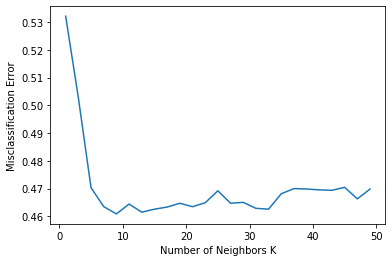

In [43]:
mse = [1 - x for x in cv_scores]

optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.savefig('knnerror.jpg')
plt.show()